<a href="https://colab.research.google.com/github/xjsh1997/STAT6289/blob/main/HW3_Jiashu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#import package
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [33]:
#load and read the data
url ='https://raw.githubusercontent.com/xjsh1997/STAT6289/main/TSLA.csv'
df=pd.read_csv(url)
print("Number of rows and columns:", df.shape)
df.head(5)

#take the Close (at the 5th column of df) as the desired output
#and extract the value in sequence according to the timestamp 
training_set = df.iloc[:800, 4:5].values
test_set = df.iloc[800:, 4:5].values

Number of rows and columns: (1259, 7)


In [34]:
# Feature Scaling for the training part(1:800) in a range of [0,1]
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
#take a look back of 60 time step and we get 740 obs from training set
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)


In [22]:
model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))
# Adding the output layer
model1.add(Dense(units = 1))

# Compiling the RNN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model1.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
24/24 [==============================] - 11s 136ms/step - loss: 0.0731
Epoch 2/50
24/24 [==============================] - 3s 132ms/step - loss: 0.0204
Epoch 3/50
24/24 [==============================] - 3s 130ms/step - loss: 0.0148
Epoch 4/50
24/24 [==============================] - 3s 129ms/step - loss: 0.0124
Epoch 5/50
24/24 [==============================] - 3s 132ms/step - loss: 0.0130
Epoch 6/50
24/24 [==============================] - 3s 124ms/step - loss: 0.0135
Epoch 7/50
24/24 [==============================] - 3s 130ms/step - loss: 0.0123
Epoch 8/50
24/24 [==============================] - 3s 126ms/step - loss: 0.0111
Epoch 9/50
24/24 [==============================] - 3s 128ms/step - loss: 0.0114
Epoch 10/50
24/24 [==============================] - 3s 124ms/step - loss: 0.0116
Epoch 11/50
24/24 [==============================] - 3s 137ms/step - loss: 0.0108
Epoch 12/50
24/24 [==============================] - 3s 127ms/step - loss: 0.0107
Epoch 13/50
24/24 [=====

In [26]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

dataset_train.head(5)

(459, 60, 1)


,Open
0,52.444000
1,52.450001
2,52.419998
3,53.348000
4,52.844002


In [23]:
###make prediction
predicted_stock_price = model1.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

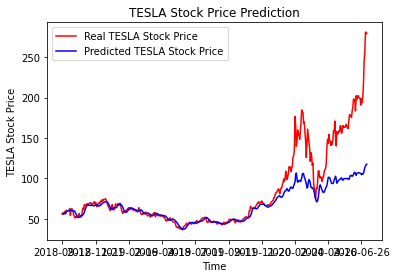

In [25]:
#visulize the result
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()